In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import os
import sys
if 'SUMO_HOME' in os.environ:
    sys.path.append(os.path.join(os.environ['SUMO_HOME'], 'tools'))
import traci


In [ ]:
traci.close()

In [ ]:
#current condition 
traci.start(["sumo", "-c", "C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\SUMO_configuration.sumocfg"])

lanes_to_monitor = [ "-9045_1"]

vehicles_in_lane = {lane: set() for lane in lanes_to_monitor}

step = 0
while step < 30000:
    traci.simulationStep()

    for lane in lanes_to_monitor:
        vehicles = traci.lane.getLastStepVehicleIDs(lane)
        vehicles_in_lane[lane].update(vehicles)

    # Your simulation logic here
    step += 1

# Close TraCI connection
traci.close()

# Print the number of unique vehicles passing through each lane after simulation
for lane, vehicles in vehicles_in_lane.items():
    print(f"Number of unique vehicles passing through lane '{lane}' after simulation:", len(vehicles))


In [ ]:
#scenario 1
traci.start(["sumo", "-c", "C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\SUMO_configuration.sumocfg"])

lanes_to_monitor = [ "-9045_1"]

vehicles_in_lane = {lane: set() for lane in lanes_to_monitor}

step = 0
while step < 30000:
    traci.simulationStep()

    for lane in lanes_to_monitor:
        vehicles = traci.lane.getLastStepVehicleIDs(lane)
        vehicles_in_lane[lane].update(vehicles)

    # Your simulation logic here
    step += 1

# Close TraCI connection
traci.close()

# Print the number of unique vehicles passing through each lane after simulation
for lane, vehicles in vehicles_in_lane.items():
    print(f"Number of unique vehicles passing through lane '{lane}' after simulation:", len(vehicles))

In [ ]:
traci.start(["sumo", "-c", "C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\SUMO_configuration.sumocfg"])

edges_to_monitor = ["9040" , "-9040"]

# Dictionary to store the set of unique vehicle IDs passing through each edge
unique_vehicles_on_edge = {edge: set() for edge in edges_to_monitor}

simulation_duration = 40000  # Adjust as needed
for _ in range(simulation_duration):
    traci.simulationStep()

    # Check vehicles passing through each edge
    for edge in edges_to_monitor:
        vehicles = traci.edge.getLastStepVehicleIDs(edge)
        unique_vehicles_on_edge[edge].update(vehicles)

traci.close()

for edge, vehicles in unique_vehicles_on_edge.items():
    print(f"Number of unique vehicles passing through edge '{edge}' after simulation:", len(vehicles))


In [ ]:
traci.start(["sumo", "-c", "C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\SUMO_configuration.sumocfg"])

edges_to_monitor = ["-9045"]

# Dictionary to store the set of unique vehicle IDs passing through each edge
unique_vehicles_on_edge = {edge: set() for edge in edges_to_monitor}

simulation_duration = 40000  # Adjust as needed
for _ in range(simulation_duration):
    traci.simulationStep()

    # Check vehicles passing through each edge
    for edge in edges_to_monitor:
        vehicles = traci.edge.getLastStepVehicleIDs(edge)
        unique_vehicles_on_edge[edge].update(vehicles)

traci.close()

for edge, vehicles in unique_vehicles_on_edge.items():
    print(f"Number of unique vehicles passing through edge '{edge}' after simulation:", len(vehicles))

In [ ]:

# Load and parse the XML file
tree = ET.parse("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\queue_diet.xml")  # replace with your file path
root = tree.getroot()

# Initialize an empty list to store the data
lane_data = []

# Iterate over all 'data' elements in the XML
for data in root.iter('data'):
    # Get the timestep attribute from the 'data' element
    timestep = data.attrib['timestep']
    # Iterate over all 'lane' elements within 'data'
    for lane in data.iter('lane'):
        # Check if the 'id' attribute is '-9045_1'
        if lane.attrib['id'] == '9040_0':
            # If it is, append the lane data and the timestep to our list
            lane_info = lane.attrib
            lane_info['timestep'] = timestep
            lane_data.append(lane_info)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(lane_data)

# Keep only the columns we're interested in
df = df[['timestep', 'queueing_time', 'queueing_length', 'queueing_length_experimental']]

print(df)




In [ ]:
# Convert 'timestep' and 'queueing_length' to numeric types for plotting
df['timestep'] = pd.to_numeric(df['timestep'])
df['queueing_length'] = pd.to_numeric(df['queueing_length'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['timestep'], df['queueing_length'])
plt.xlabel('Time Step')
plt.ylabel('Queueing Length')
plt.title('Queueing Length over Time for Lane 9040_0')
plt.grid(True)
plt.show()

In [ ]:

# Load and parse the XML file
tree = ET.parse('queue_s1.xml')  # replace with your file path
root = tree.getroot()

# Initialize an empty list to store the data
lane_data = []

# Iterate over all 'data' elements in the XML
for data in root.iter('data'):
    # Get the timestep attribute from the 'data' element
    timestep = data.attrib['timestep']
    # Iterate over all 'lane' elements within 'data'
    for lane in data.iter('lane'):
        # Check if the 'id' attribute is '-9045_1'
        if lane.attrib['id'] == '-9045_1':
            # If it is, append the lane data and the timestep to our list
            lane_info = lane.attrib
            lane_info['timestep'] = timestep
            lane_data.append(lane_info)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(lane_data)

# Keep only the columns we're interested in
df = df[['timestep', 'queueing_time', 'queueing_length', 'queueing_length_experimental']]

print(df)


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

def get_lane_data(file_path, lane_id):
    # Load and parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Initialize an empty list to store the data
    lane_data = []

    # Iterate over all 'data' elements in the XML
    for data in root.iter('data'):
        # Get the timestep attribute from the 'data' element
        timestep = data.attrib['timestep']
        # Iterate over all 'lane' elements within 'data'
        for lane in data.iter('lane'):
            # Check if the 'id' attribute is the lane_id
            if lane.attrib['id'] == lane_id:
                # If it is, append the lane data and the timestep to our list
                lane_info = lane.attrib
                lane_info['timestep'] = timestep
                lane_data.append(lane_info)

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(lane_data)

    # Keep only the columns we're interested in
    df = df[['timestep', 'queueing_time', 'queueing_length', 'queueing_length_experimental']]

    # Convert 'timestep' and 'queueing_length' to numeric types for plotting
    df['timestep'] = pd.to_numeric(df['timestep'])
    df['queueing_length'] = pd.to_numeric(df['queueing_length'])

    return df

# Get the lane data from both XML files
df1 = get_lane_data('queue1.xml', '-9045_1')  # replace with your file path
df2 = get_lane_data('queue2.xml', '-9045_1')  # replace with your file path

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df1['timestep'], df1['queueing_length'], color='blue', label='queue1.xml')
plt.plot(df2['timestep'], df2['queueing_length'], color='red', label='queue2.xml')
plt.xlabel('Time Step')
plt.ylabel('Queueing Length')
plt.title('Queueing Length over Time for Lane -9045_1')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def get_lane_data(file_path, lane_id):
    
    tree = ET.parse(file_path)
    root = tree.getroot()

    
    lane_data = []

    
    for data in root.iter('data'):
        
        timestep = data.attrib['timestep']
        
        for lane in data.iter('lane'):
            
            if lane.attrib['id'] == lane_id:
                
                lane_info = lane.attrib
                lane_info['timestep'] = timestep
                lane_data.append(lane_info)

    
    df = pd.DataFrame(lane_data)

    
    df = df[['timestep', 'queueing_time', 'queueing_length', 'queueing_length_experimental']]

    # Convert 'timestep' and 'queueing_length' to numeric types for plotting
    df['timestep'] = pd.to_numeric(df['timestep'])
    df['queueing_length'] = pd.to_numeric(df['queueing_length'])

    return df

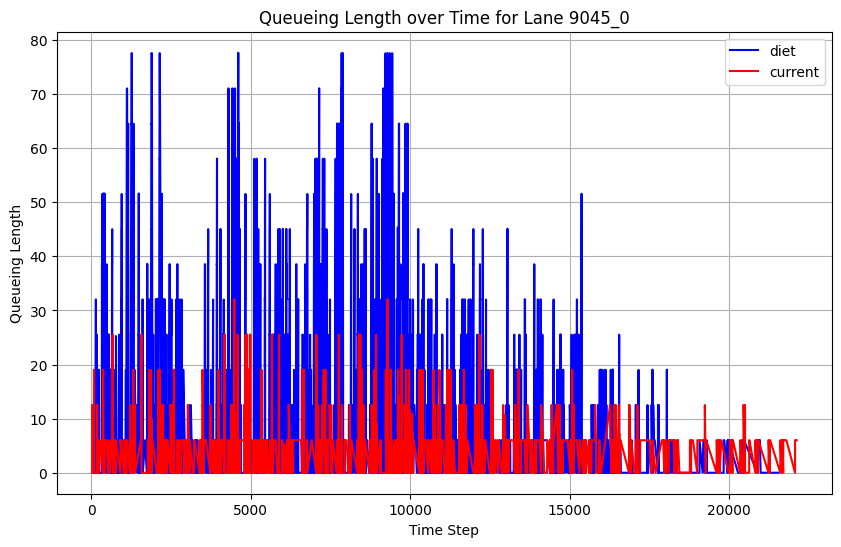

In [10]:




df1 = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\queue_diet.xml", '9045_0')  # replace with your file path
df2 = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\queue_current.xml", '9045_0')  # replace with your file path


plt.figure(figsize=(10, 6))
plt.plot(df1['timestep'], df1['queueing_length'], color='blue', label='diet')
plt.plot(df2['timestep'], df2['queueing_length'], color='red', label='current')
plt.xlabel('Time Step')
plt.ylabel('Queueing Length')
plt.title('Queueing Length over Time for Lane 9045_0')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\mehdi\AppData\Local\Temp\ipykernel_7652\2160647912.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1_resampled = df1['queueing_length'].resample('5T').mean()
C:\Users\mehdi\AppData\Local\Temp\ipykernel_7652\2160647912.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df2_resampled = df2['queueing_length'].resample('5T').mean()


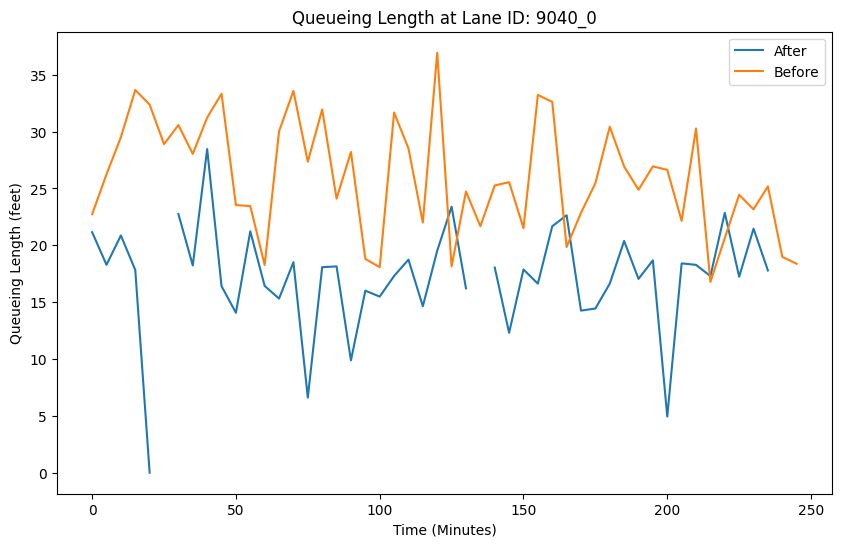

In [13]:
df1 = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_after.xml",'9040_1')  
df2 = get_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\ITSC\\sc2\\q\\queue_before.xml", '9040_1')

# Convert 'timestep' to datetime and set it as index
df1['timestep'] = pd.to_datetime(df1['timestep'], unit='s')
df1.set_index('timestep', inplace=True)

df2['timestep'] = pd.to_datetime(df2['timestep'], unit='s')
df2.set_index('timestep', inplace=True)

# Resample the data at 5-minute intervals
df1_resampled = df1['queueing_length'].resample('5T').mean()
df2_resampled = df2['queueing_length'].resample('5T').mean()


# Convert the datetime index back to minutes
df1_resampled.index = (df1_resampled.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1min')
df2_resampled.index = (df2_resampled.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1min')


# Convert 'queueing_length' from meters to feet
df1_resampled = df1_resampled * 3.281
df2_resampled = df2_resampled * 3.281

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(df1_resampled.index, df1_resampled.values, label='After')
plt.plot(df2_resampled.index, df2_resampled.values, label='Before')
plt.xlabel('Time (Minutes)')
plt.ylabel('Queueing Length (feet)')
plt.title('Queueing Length at Lane ID: 9040_0')
plt.legend()
plt.show()

In [ ]:
# Convert 'queueing_length' from meters to feet
df1_resampled = df1_resampled * 3.281
df2_resampled = df2_resampled * 3.281


plt.figure(figsize=(10,6))
plt.plot(df1_resampled.index, df1_resampled.values, label='Diet')
plt.plot(df2_resampled.index, df2_resampled.values, label='Current')
plt.xlabel('Time')
plt.ylabel('Queueing Length (feet)')
plt.title('Queueing Length at Lane ID: 9052_0')
plt.legend()
plt.show()


In [24]:
def get_all_lane_data(file_path):
    
    tree = ET.parse(file_path)
    root = tree.getroot()

    lane_data = []

    for data in root.iter('data'):
        
        timestep = data.attrib['timestep']
        
        for lane in data.iter('lane'):
            
            lane_info = lane.attrib
            lane_info['timestep'] = timestep
            lane_data.append(lane_info)

    df = pd.DataFrame(lane_data)

    df = df[['timestep', 'queueing_time', 'queueing_length', 'queueing_length_experimental']]

    # Convert 'timestep' and 'queueing_length' to numeric types for plotting
    df['timestep'] = pd.to_numeric(df['timestep'])
    df['queueing_length'] = pd.to_numeric(df['queueing_length'])

    return df


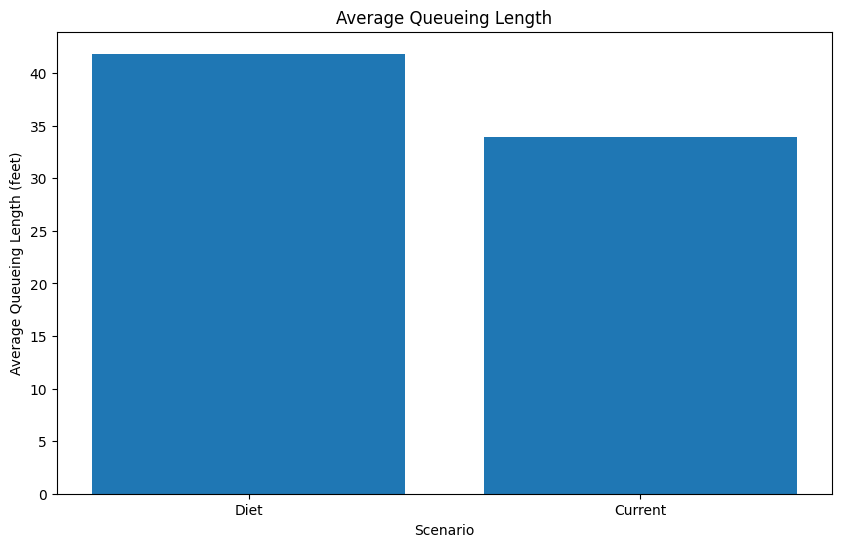

In [28]:
df1 = get_all_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\queue_diet.xml")
df2 = get_all_lane_data("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\queue_current.xml")

avg_queueing_length_df1 = df1['queueing_length'].mean() * 3.281
avg_queueing_length_df2 = df2['queueing_length'].mean() * 3.281

# Data to plot
labels = ['Diet', 'Current']
values = [avg_queueing_length_df1, avg_queueing_length_df2]

plt.figure(figsize=(10, 6))

plt.bar(labels, values)

plt.title('Average Queueing Length')
plt.xlabel('Scenario')
plt.ylabel('Average Queueing Length (feet)')

plt.show()


In [29]:
avg_queueing_length_df2

33.95949781692297

In [31]:


# Parse the XML file
tree = ET.parse("C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\currernt_edge_data.xml")
root = tree.getroot()

# Initialize empty lists to store the data
data = []

# Iterate over each 'interval' in the XML file
for interval in root.findall('interval'):
    interval_id = interval.get('id')
    interval_begin = interval.get('begin')
    interval_end = interval.get('end')

    # Iterate over each 'edge' in the 'interval'
    for edge in interval.findall('edge'):
        edge_data = edge.attrib
        edge_data['interval_id'] = interval_id
        edge_data['interval_begin'] = interval_begin
        edge_data['interval_end'] = interval_end
        data.append(edge_data)

# Convert the list into a DataFrame
df_edge_data = pd.DataFrame(data)


In [32]:
df

,id,sampledSeconds,traveltime,overlapTraveltime,density,laneDensity,occupancy,waitingTime,timeLoss,speed,speedRelative,departed,arrived,entered,left,laneChangedFrom,laneChangedTo,interval_id,interval_begin,interval_end
0,-1656,19.41,6.24,6.51,0.74,0.37,0.17,0.00,5.81,14.26,0.68,0,3,3,0,0,0,dump_900,0.00,300.00
1,-2239,503.14,21.71,22.28,20.57,6.86,3.38,254.00,395.34,3.88,0.21,24,0,0,24,8,8,dump_900,0.00,300.00
2,-9039,129.67,21.11,21.72,2.53,0.84,0.41,0.00,11.04,8.09,0.90,0,6,6,0,0,0,dump_900,0.00,300.00
3,-9040,280.60,7.71,8.45,17.67,8.84,4.10,52.00,143.18,6.86,0.49,0,0,34,33,7,7,dump_900,0.00,300.00
4,-9045,434.67,10.38,11.67,17.41,8.71,4.01,73.00,197.39,7.56,0.54,0,0,38,36,15,15,dump_900,0.00,300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,9040,51.78,24.94,25.89,3.30,1.10,0.54,39.00,43.91,2.21,0.16,0,0,2,2,0,0,dump_900,22200.00,22500.00
1691,9045,22.95,10.31,11.48,0.92,0.46,0.22,4.00,10.60,7.69,0.55,0,0,2,2,0,0,dump_900,22200.00,22500.00
1692,9052,5.02,2.64,3.01,0.52,0.26,0.11,0.00,0.64,12.42,0.89,0,0,1,2,0,0,dump_900,22200.00,22500.00
1693,9069,9.60,9.24,9.60,0.27,0.13,0.06,0.00,0.80,12.95,0.93,0,0,1,1,0,0,dump_900,22200.00,22500.00


#  travel time

C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\260239034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge['interval_begin'] = pd.to_numeric(df_edge['interval_begin'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\260239034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge['traveltime'] = pd.to_numeric(df_edge['traveltime'])


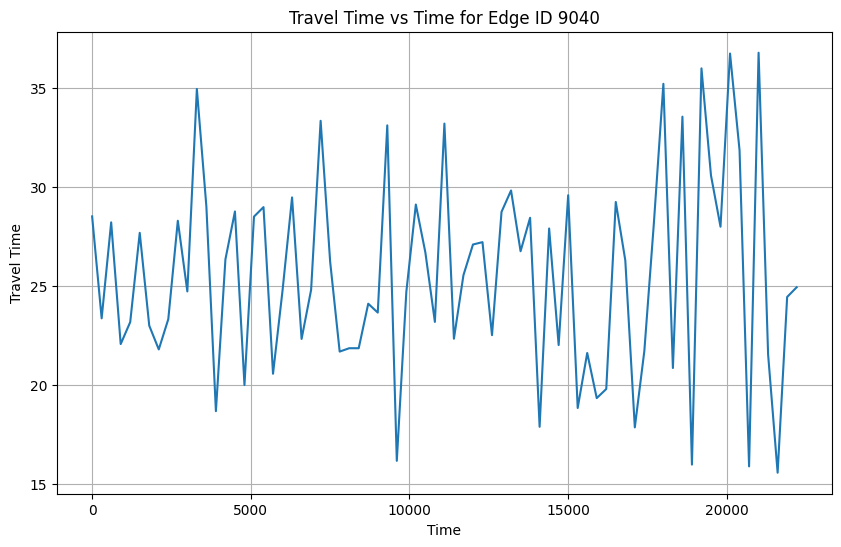

In [33]:
import matplotlib.pyplot as plt

# Replace 'your_edge_id' with the id of the edge you're interested in
edge_id = '9040'

# Filter the DataFrame for the specific edge id
df_edge = df[df['id'] == edge_id]

# Convert 'interval_begin' and 'traveltime' to numeric types
df_edge['interval_begin'] = pd.to_numeric(df_edge['interval_begin'])
df_edge['traveltime'] = pd.to_numeric(df_edge['traveltime'])

# Plot travel time vs time
plt.figure(figsize=(10, 6))
plt.plot(df_edge['interval_begin'], df_edge['traveltime'])
plt.xlabel('Time')
plt.ylabel('Travel Time')
plt.title(f'Travel Time vs Time for Edge ID {edge_id}')
plt.grid(True)
plt.show()


C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\3368355975.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge1['interval_begin'] = pd.to_numeric(df_edge1['interval_begin'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\3368355975.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge1['traveltime'] = pd.to_numeric(df_edge1['traveltime'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\3368355975.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

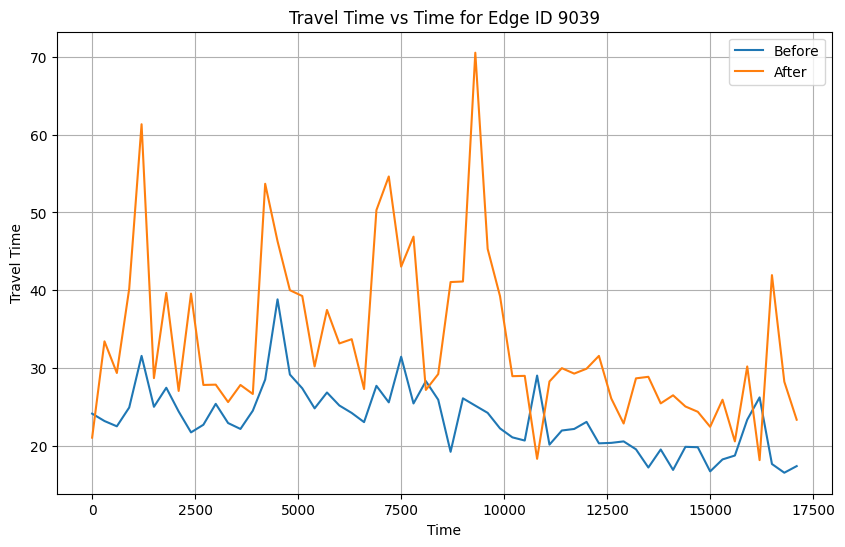

In [42]:


def parse_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []

    # Iterate over each 'interval' in the XML file
    for interval in root.findall('interval'):
        interval_id = interval.get('id')
        interval_begin = interval.get('begin')
        interval_end = interval.get('end')

        # Iterate over each 'edge' in the 'interval'
        for edge in interval.findall('edge'):
            edge_data = edge.attrib
            edge_data['interval_id'] = interval_id
            edge_data['interval_begin'] = interval_begin
            edge_data['interval_end'] = interval_end
            data.append(edge_data)

    df = pd.DataFrame(data)
    return df

edge_id = '9039'

df1 = parse_xml('C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\currernt_edge_data.xml')
df2 = parse_xml('C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\diet_edge_data.xml')

df_edge1 = df1[df1['id'] == edge_id]
df_edge2 = df2[df2['id'] == edge_id]

df_edge1['interval_begin'] = pd.to_numeric(df_edge1['interval_begin'])
df_edge1['traveltime'] = pd.to_numeric(df_edge1['traveltime'])
df_edge2['interval_begin'] = pd.to_numeric(df_edge2['interval_begin'])
df_edge2['traveltime'] = pd.to_numeric(df_edge2['traveltime'])

plt.figure(figsize=(10, 6))
plt.plot(df_edge1['interval_begin'], df_edge1['traveltime'], label='Before')
plt.plot(df_edge2['interval_begin'], df_edge2['traveltime'], label='After')
plt.xlabel('Time')
plt.ylabel('Travel Time')
plt.title(f'Travel Time vs Time for Edge ID {edge_id}')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\2823032544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge1['avg_traffic_volume'] = pd.to_numeric(df_edge1['speed']) * 3.6 * pd.to_numeric(df_edge1['density'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\2823032544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge2['avg_traffic_volume'] = pd.to_numeric(df_edge2['speed']) * 3.6 * pd.to_numeric(df_edge2['density'])


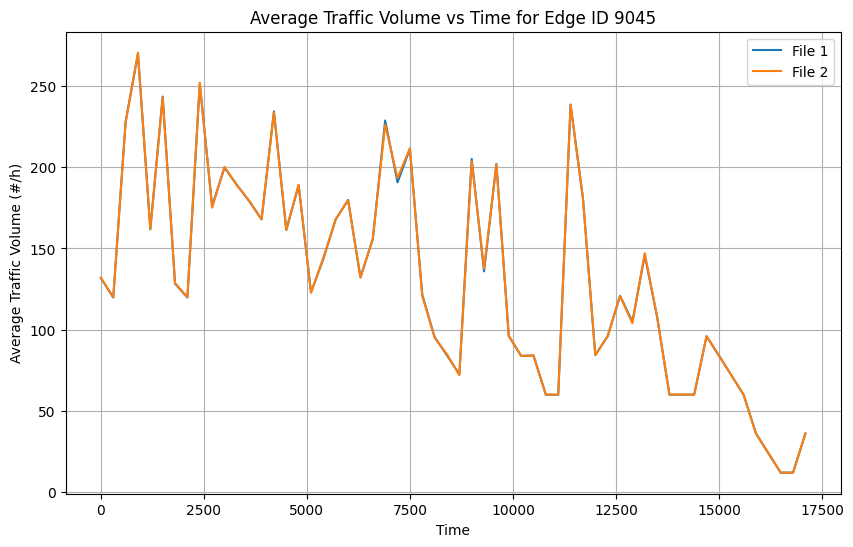

In [44]:
edge_id = '9045'

# Calculate average traffic volume for both DataFrames
df_edge1['avg_traffic_volume'] = pd.to_numeric(df_edge1['speed']) * 3.6 * pd.to_numeric(df_edge1['density'])
df_edge2['avg_traffic_volume'] = pd.to_numeric(df_edge2['speed']) * 3.6 * pd.to_numeric(df_edge2['density'])

# Plot average traffic volume vs time for both DataFrames
plt.figure(figsize=(10, 6))
plt.plot(df_edge1['interval_begin'], df_edge1['avg_traffic_volume'], label='File 1')
plt.plot(df_edge2['interval_begin'], df_edge2['avg_traffic_volume'], label='File 2')
plt.xlabel('Time')
plt.ylabel('Average Traffic Volume (#/h)')
plt.title(f'Average Traffic Volume vs Time for Edge ID {edge_id}')
plt.legend()
plt.grid(True)
plt.show()


# Occupancy of the edge/lane in %. A value of 100 would indicate vehicles standing bumper to bumper on the whole edge (minGap=0).

C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\2896440744.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge1['interval_begin'] = pd.to_numeric(df_edge1['interval_begin'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\2896440744.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edge1['occupancy'] = pd.to_numeric(df_edge1['occupancy'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_29920\2896440744.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

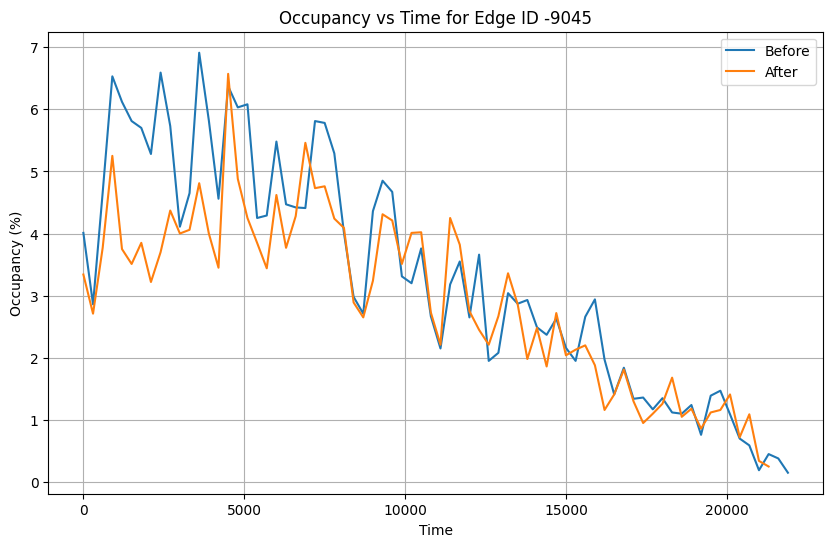

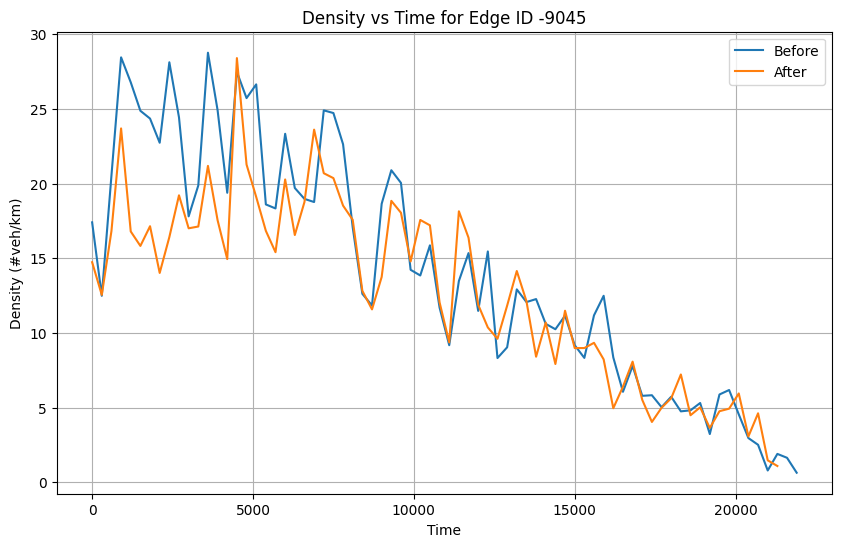

In [68]:


def parse_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []

    # Iterate over each 'interval' in the XML file
    for interval in root.findall('interval'):
        interval_id = interval.get('id')
        interval_begin = interval.get('begin')
        interval_end = interval.get('end')

        # Iterate over each 'edge' in the 'interval'
        for edge in interval.findall('edge'):
            edge_data = edge.attrib
            edge_data['interval_id'] = interval_id
            edge_data['interval_begin'] = interval_begin
            edge_data['interval_end'] = interval_end
            data.append(edge_data)

    df = pd.DataFrame(data)
    return df

edge_id = '-9045'

df1 = parse_xml('C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario1_current\\currernt_edge_data.xml')
df2 = parse_xml('C:\\Users\\mehdi\\OneDrive - University of Tennessee\\Documents\\CUIP Projects\\Fraizer street\\Final\\Scenario2\\diet_edge_data.xml')

df_edge1 = df1[df1['id'] == edge_id]
df_edge2 = df2[df2['id'] == edge_id]

df_edge1['interval_begin'] = pd.to_numeric(df_edge1['interval_begin'])
df_edge1['occupancy'] = pd.to_numeric(df_edge1['occupancy'])
df_edge1['density'] = pd.to_numeric(df_edge1['density'])
df_edge2['interval_begin'] = pd.to_numeric(df_edge2['interval_begin'])
df_edge2['occupancy'] = pd.to_numeric(df_edge2['occupancy'])
df_edge2['density'] = pd.to_numeric(df_edge2['density'])

plt.figure(figsize=(10, 6))
plt.plot(df_edge1['interval_begin'], df_edge1['occupancy'], label='Before')
plt.plot(df_edge2['interval_begin'], df_edge2['occupancy'], label='After')
plt.xlabel('Time')
plt.ylabel('Occupancy (%)')
plt.title(f'Occupancy vs Time for Edge ID {edge_id}')
plt.legend()
plt.grid(True)
plt.show()



# Plot density vs time for both DataFrames
plt.figure(figsize=(10, 6))
plt.plot(df_edge1['interval_begin'], df_edge1['density'], label='Before')
plt.plot(df_edge2['interval_begin'], df_edge2['density'], label='After')
plt.xlabel('Time')
plt.ylabel('Density (#veh/km)')
plt.title(f'Density vs Time for Edge ID {edge_id}')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
print(df_edge1['interval_begin'].max())
print(df_edge2['interval_begin'].max())

22200.0
21300.0


In [ ]:
df_edge1